In [83]:
import numpy as np
import matplotlib.pyplot as plt

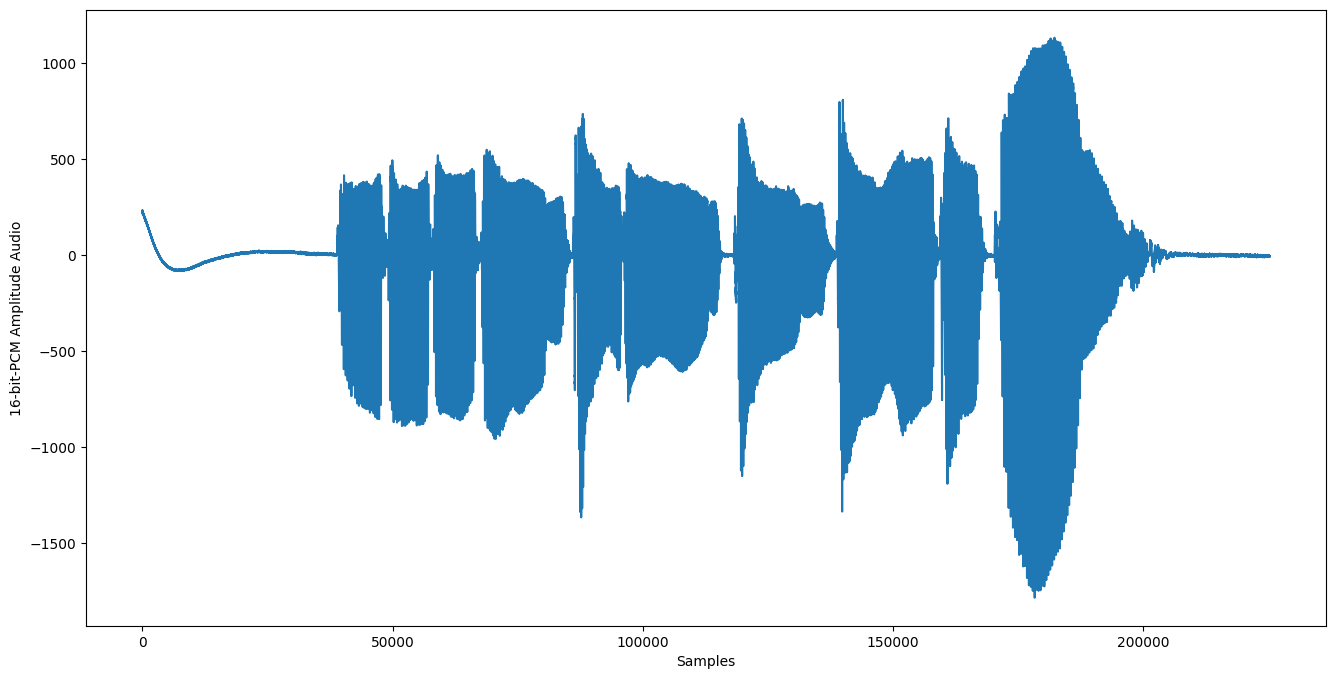

In [84]:
# Nr. 1 a)

path = "Versuch4Daten/aufgabe1a/aufnahme2.npy"

y = np.load(path)

plt.figure(figsize=(16,8))
plt.plot(y)
plt.xlabel("Samples")
plt.ylabel("16-bit-PCM Amplitude Audio")
plt.show()

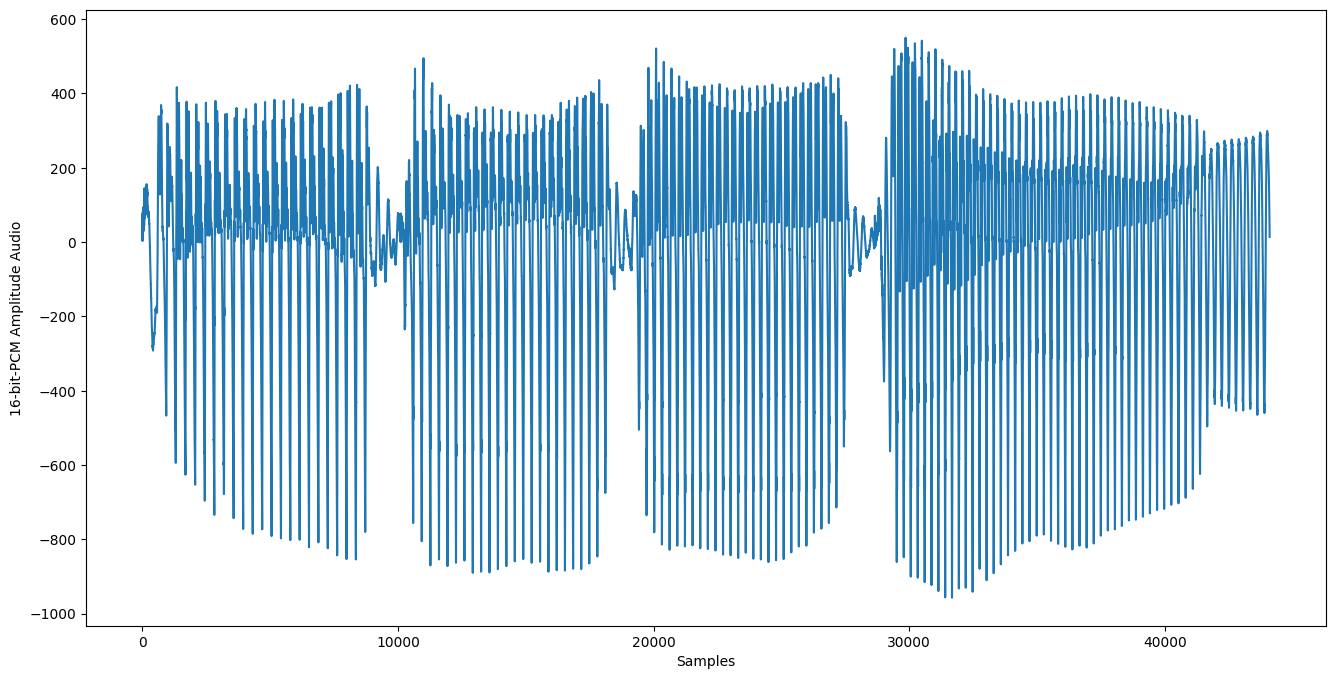

In [85]:
#Nr. 1 b)

y_list = y.tolist()

first20 = 20000
for x in y_list[20000:]:
    if x >= 50 or x <= -50:
        break
    first20 += 1

oneSecond = y_list[first20: first20 + 44100]

plt.figure(figsize=(16,8))
plt.plot(oneSecond)
plt.xlabel("Samples")
plt.ylabel("16-bit-PCM Amplitude Audio")
plt.show()

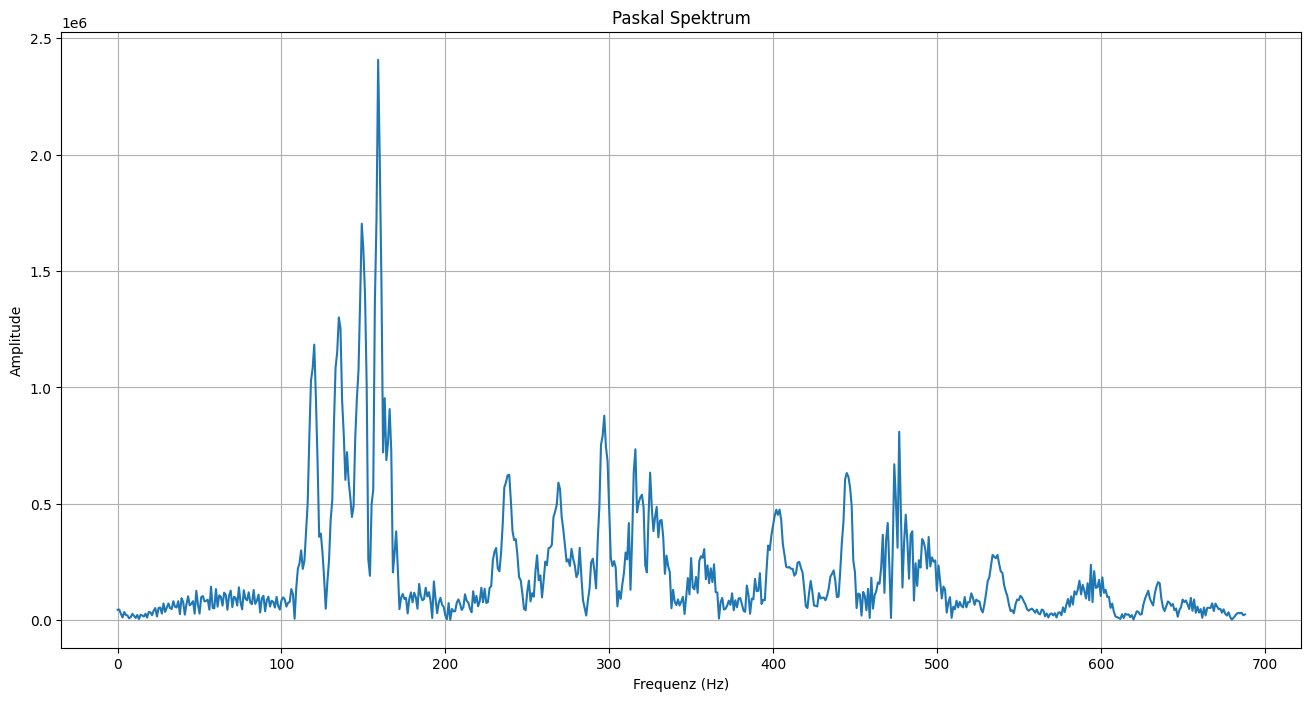

In [95]:
# Nr. 1 c)

def spectrum_plotten(data, limit, titel):

    amplitude_values = data
    M = len(amplitude_values)
    delta_t = 1. / 44100.
    
    fft_result = np.fft.fft(amplitude_values)
    amplitude_spectrum = np.abs(fft_result)
    
    frequencies = np.array(range(M))
    for n in range(M):
        frequencies[n] = n / (M * delta_t)
        
    positive_freqs = frequencies[:M // limit]
    positive_amplitudes = amplitude_spectrum[:M // limit]
    
    
    
    plt.figure(figsize=(16, 8))
    plt.plot(positive_freqs, positive_amplitudes)
    plt.xlabel("Frequenz (Hz)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.title(titel)
    plt.show()

spectrum_plotten(oneSecond, 64, "Paskal Spektrum")

In [96]:
# Nr. 1 d)

def windowing(data):

    fs = 44100
    window_size = 512
    overlap = window_size // 2
    std_dev = window_size / 4
    
    def gaussian_window(length, std_dev):
        n = np.arange(length)
        center = (length - 1) / 2
        window = np.exp(-0.5 * ((n - center) / std_dev) ** 2)
        return window
    
    abschnitte = [
        data[i:i + window_size]
        for i in range(0, len(data) - window_size + 1, overlap)
    ]
    
    gaus = gaussian_window(window_size, std_dev)
    
    gaus_fenster = np.array([abschnitt * gaus for abschnitt in abschnitte])
    
    durchschnitt = np.mean(gaus_fenster, axis=0)
    return durchschnitt
    

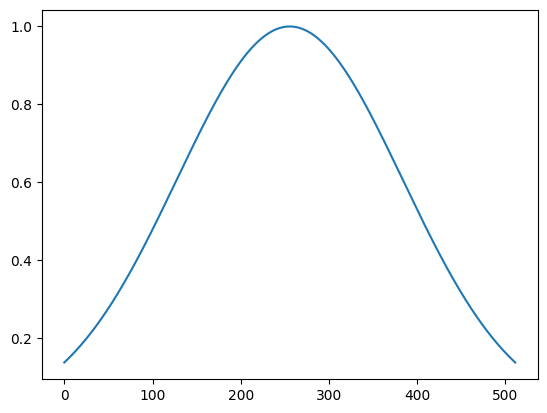

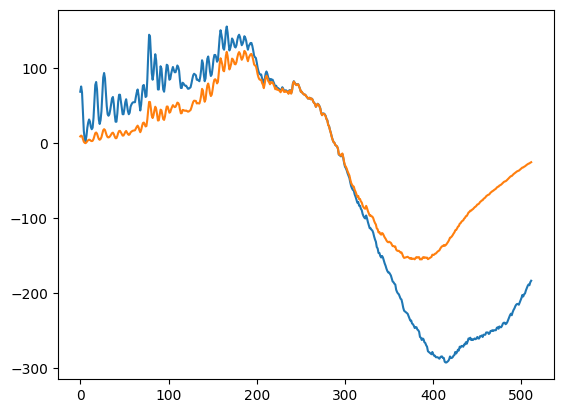

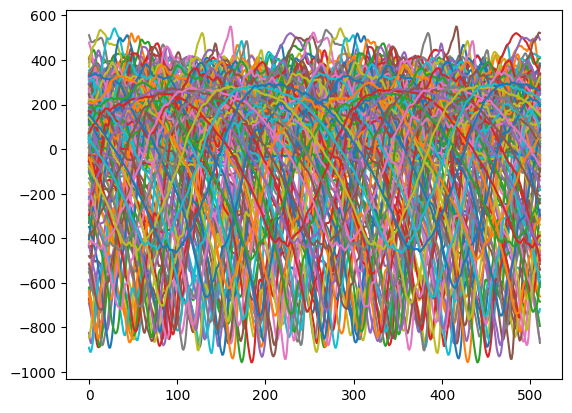

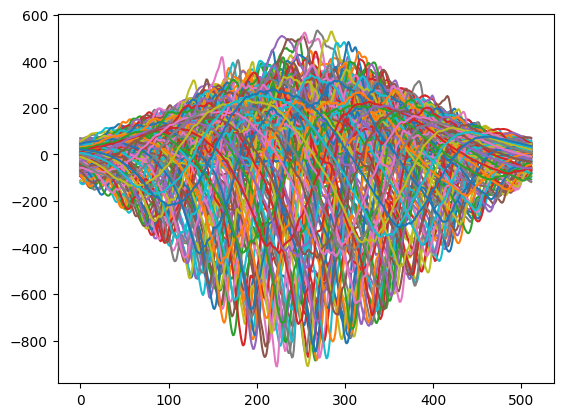

In [97]:
plt.plot(gaus)
plt.show()

plt.plot(abschnitte[0])
plt.plot(gaus_fenster[0])
plt.show()

for x in abschnitte:
    plt.plot(x)
plt.show()
for x in gaus_fenster:
    plt.plot(x)
plt.show()

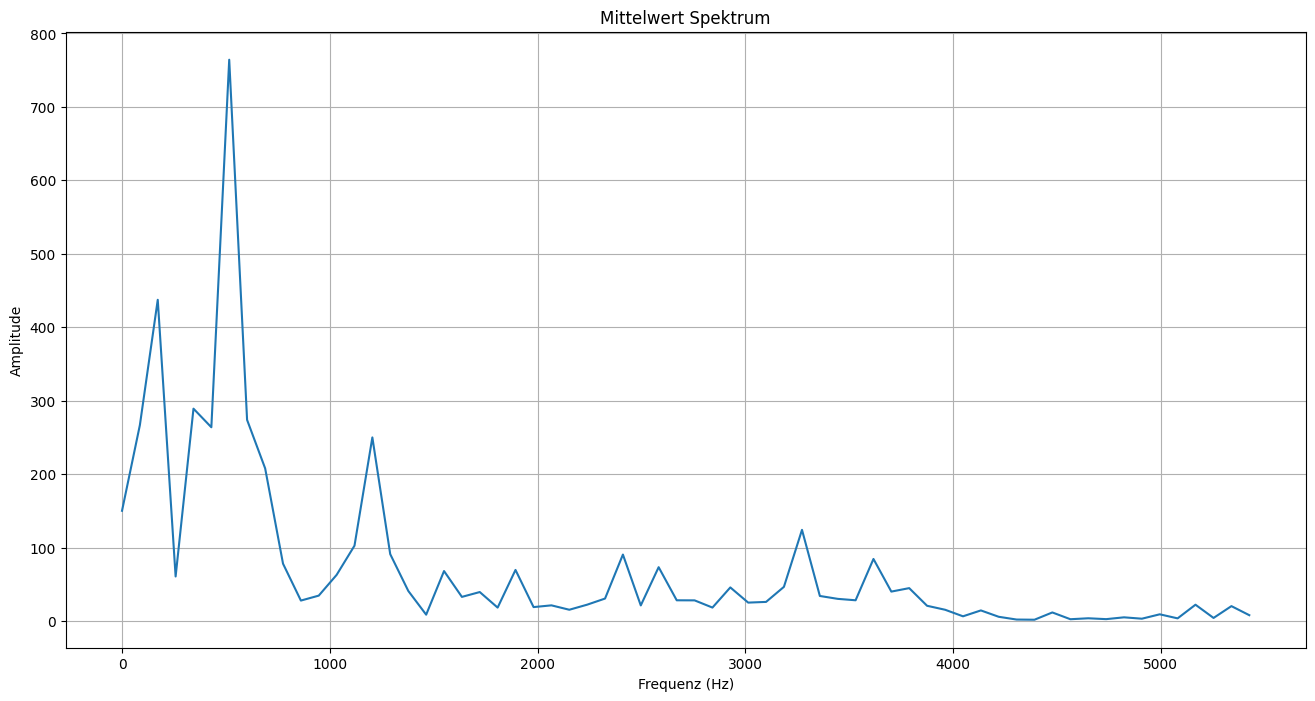

In [98]:
spectrum_plotten(windowing(oneSecond), 8, "Mittelwert Spektrum")

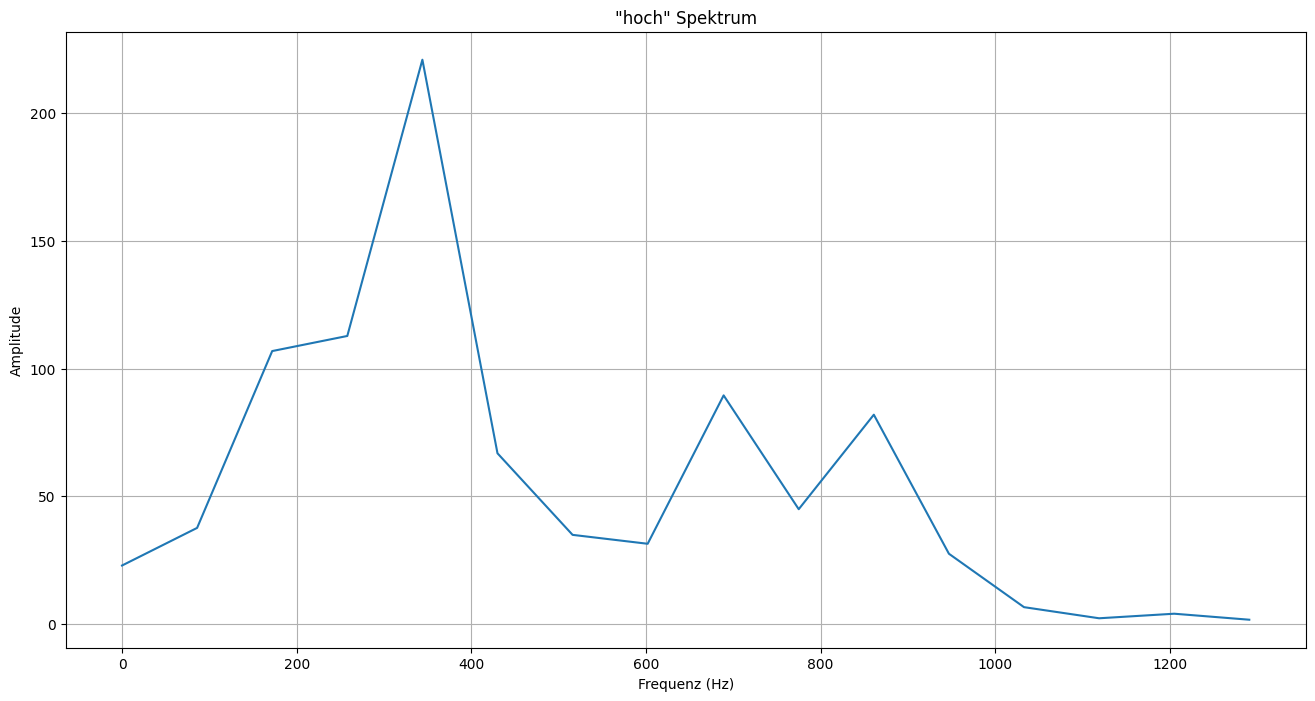

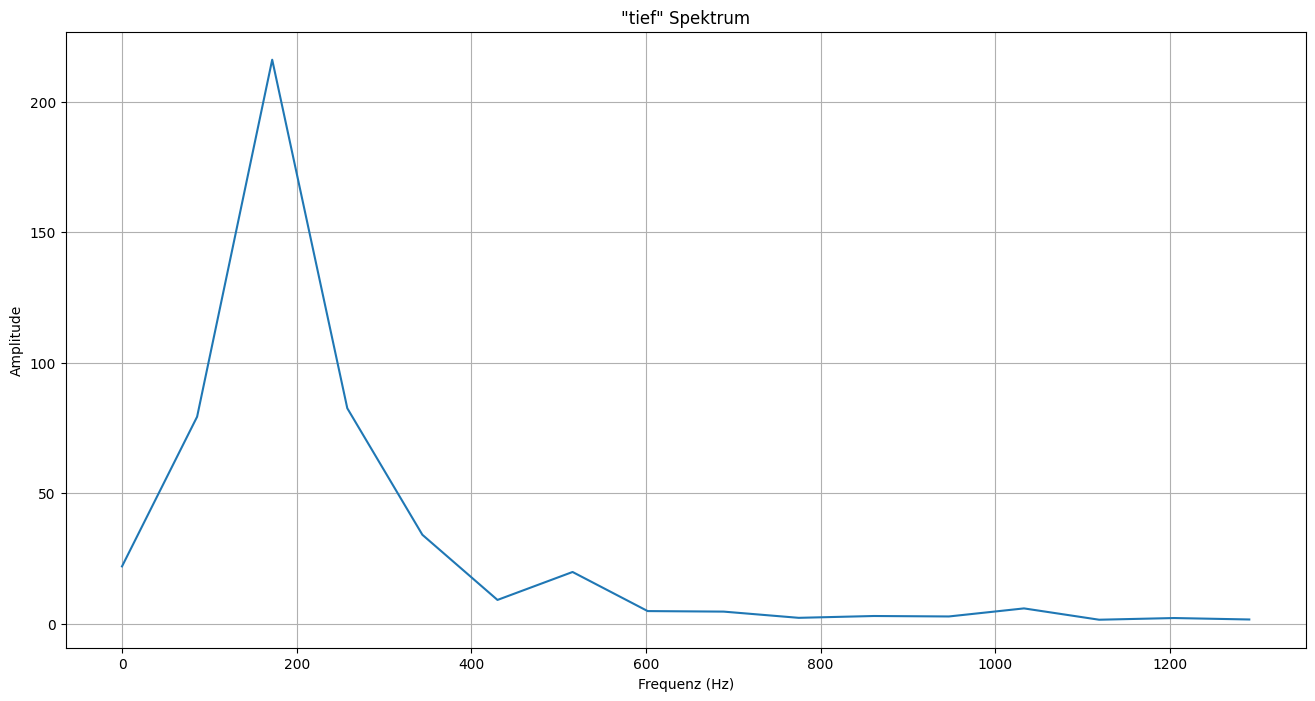

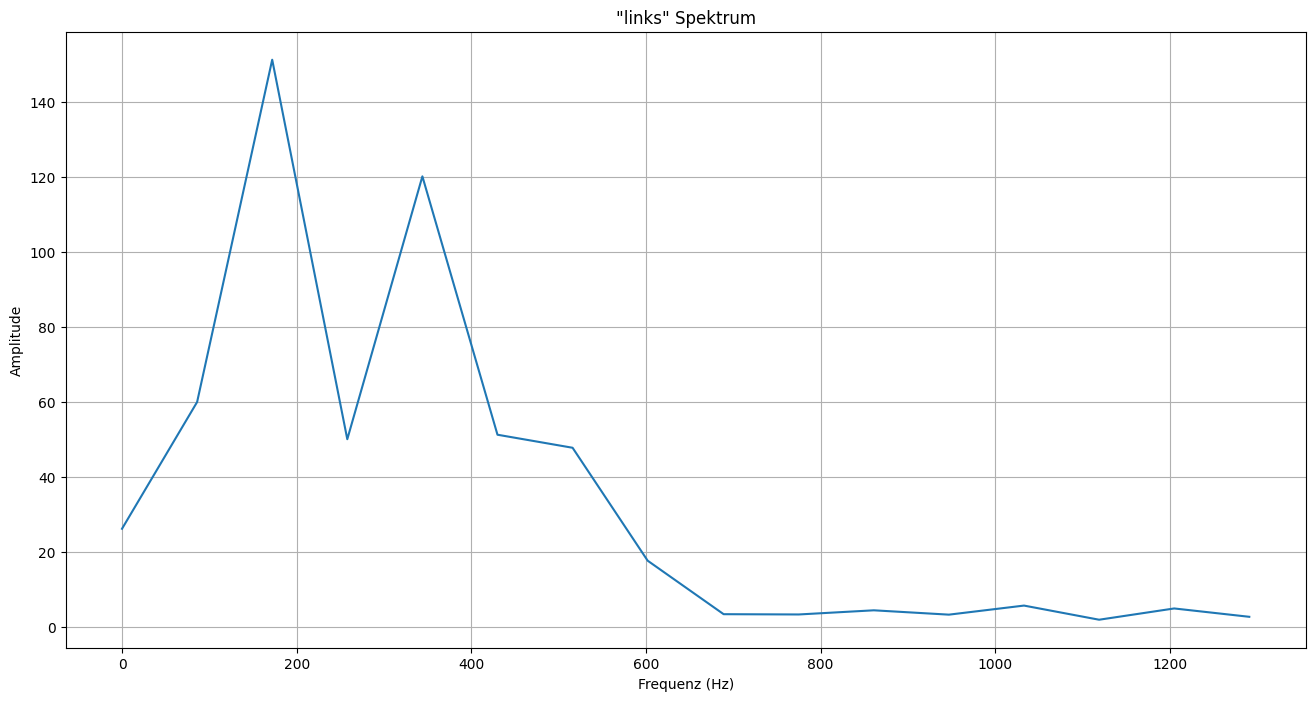

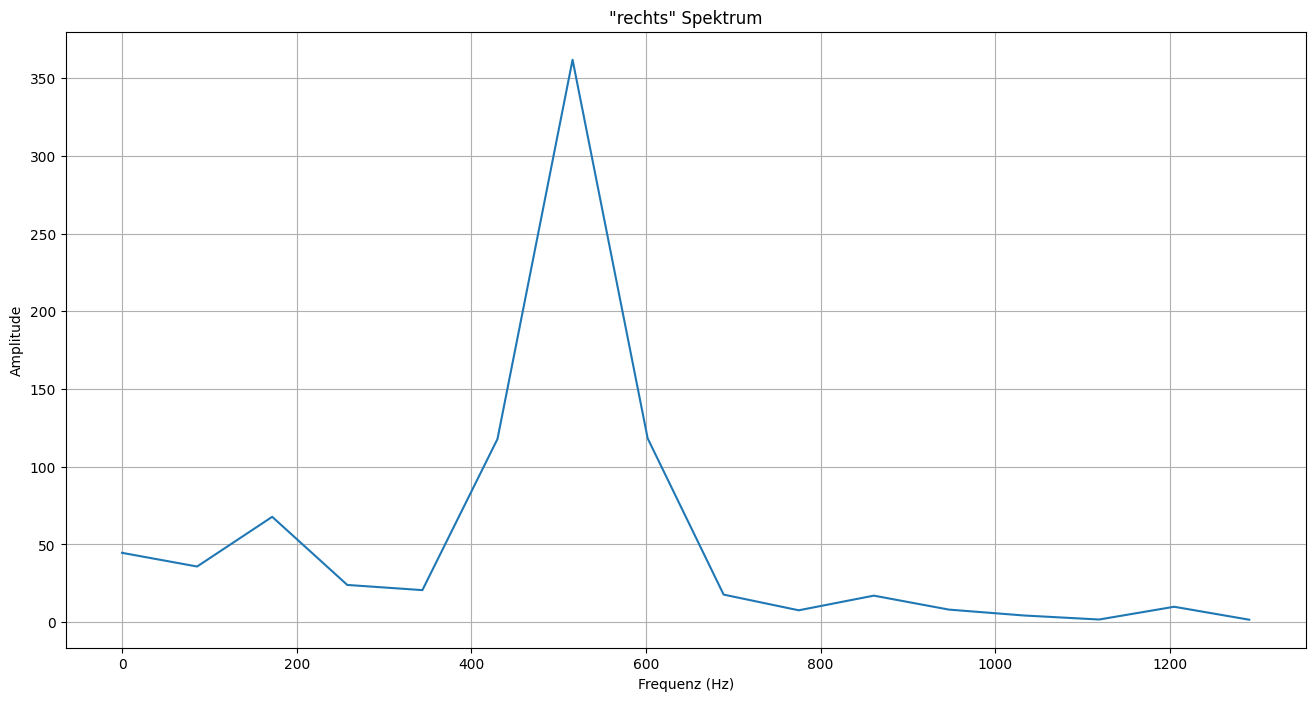

In [106]:
worter = ["hoch", "tief", "links", "rechts"]

for wort in worter:

    data = []
    for i in range(1, 6):
        path = f"Versuch4Daten/{wort}/{wort}{i}.npy"
        y = np.load(path)
        data.append(y)
    
    freq_spectren = np.array(list(map(lambda x: windowing(x), data)))
    
    mittel = np.mean(freq_spectren, axis=0)
    
    spectrum_plotten(mittel, 32, f"\"{wort}\" Spektrum")